In [4]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils import data
torch.set_default_tensor_type(torch.cuda.FloatTensor)

root_dir = "./data/train";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

trainloader = data.DataLoader(train_set, batch_size = 1, shuffle = True)

root_dir = "./data/test";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

testloader = data.DataLoader(train_set, batch_size = 1, shuffle = True)

# classes = torch.tensor(range(0,28))
classes = ('Natalie Portman', 'Julia Roberts', 'Neil Patrick Harris'
                    , 'Keifer Sutherland', 'Ben Stiller', 'Anne Hathaway'
                    , 'David Boreanaz', 'Jamie Foxx', 'Sofia Vergara'
                    , 'Elizabeth Banks', 'Jensen Ackles', 'Amy Adams'
                    , 'Kristen Bell', 'Bradley Cooper', 'Emily Deschanel'
                    , 'Zooey Deschanel', 'Jon Hamm', 'Scarlett Johansson'
                    , 'Blake Lively', 'Eva Longoria', 'Amy Poehler'
                    , 'Kristen Stewart', 'Kerry Washington', 'Leighton Meester'
                    , 'Olivia Wilde', 'Zac Efron', 'Miley Cyrus','Jim Parsons')
print(classes[0])


print("train size: " + str(len(trainloader)))

print("test size: " + str(len(testloader)))

Natalie Portman
train size: 11200
test size: 2772


torch.Size([1, 3, 250, 250])
tensor(19)


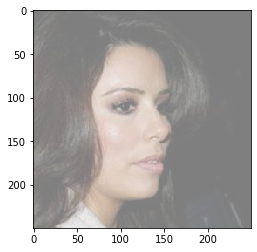

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 12, stride=2)  #250x250x3 to 76x76x6
        self.pool = nn.MaxPool2d(3, 3)              #116x116x6 to 58x58x6
        self.conv2 = nn.Conv2d(6, 16, 11)           #19x19x6 to 10x10x16
        self.fc1 = nn.Linear(16 * 10 * 10, 240)       #coś tu się dzieje, nie jestem pewnien co
        self.fc2 = nn.Linear(240, 100)
        self.fc3 = nn.Linear(100, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # print("to tu?")
        x = x.view(-1, 16 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x


net = Net(device='cuda:0')
# print(net.parameters())

In [6]:
import torch.optim as optim


# criterion = nn.L1Loss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [8]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)
def accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 10000 test images: %f %%' % (
        100 * correct / total))


In [9]:
counter=0
for epoch in range(10):  # loop over the dataset multiple times


    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # print(inputs.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            counter += 1
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
    accuracy()

print('Finished Training')


[1,  1000] loss: 3.335
[1,  2000] loss: 3.337
[1,  3000] loss: 3.336
[1,  4000] loss: 3.333
[1,  5000] loss: 3.305
[1,  6000] loss: 3.233
[1,  7000] loss: 3.175
[1,  8000] loss: 3.117
[1,  9000] loss: 3.014
[1, 10000] loss: 3.038
[1, 11000] loss: 2.960
Accuracy of the network on the 10000 test images: 17.784993 %
[2,  1000] loss: 2.889
[2,  2000] loss: 2.987
[2,  3000] loss: 3.203
[2,  4000] loss: 3.215
[2,  5000] loss: 3.202
[2,  6000] loss: 3.052
[2,  7000] loss: 3.345
[2,  8000] loss: 3.338
[2,  9000] loss: 3.340
[2, 10000] loss: 3.092
[2, 11000] loss: 3.189
Accuracy of the network on the 10000 test images: 15.476190 %
[3,  1000] loss: 2.776
[3,  2000] loss: 2.689
[3,  3000] loss: 2.662
[3,  4000] loss: 2.604
[3,  5000] loss: 2.611
[3,  6000] loss: 2.499
[3,  7000] loss: 2.786
[3,  8000] loss: 2.502
[3,  9000] loss: 2.413
[3, 10000] loss: 2.591
[3, 11000] loss: 2.514
Accuracy of the network on the 10000 test images: 29.365079 %
[4,  1000] loss: 2.318
[4,  2000] loss: 2.275
[4,  3000